<center><h1><b>EDA of Customer Churn Analysis</b></h1></center>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<b>Reading data from CSV File into a DataFrame</b>

In [5]:
df = pd.read_csv('Customer Churn.csv')

<b>Replacing Blank TotalCharges value to 0(new customer)</b>
<b>changing DataType to float</b>

In [8]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

<b>Checking for Null Values in our Dataset</b>

In [10]:
df.isnull().sum().sum()

np.int64(0)

<b>Overall Summary of Our Dataset</b>

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<b>Checking for Duplicates in the dataset using the Primary Key(Unique)</b>

In [13]:
df["customerID"].duplicated().sum()

np.int64(0)

<b>Converting Wrong DataType of Senior Citizen Column(0,1) to (no,yes)</b>

In [18]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

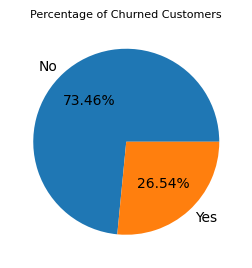

In [36]:
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.figure(figsize = (3,4))
plt.title("Percentage of Churned Customers",fontsize= 8)
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.show()

<b>From the Above Given Pie Chart we can conclude that <strong>26.54 % </strong>of our Customers have Churned Out</b>

<b>Now lets Explore the Reasons Behind it</b>

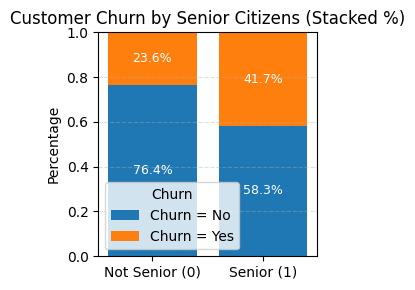

In [41]:

# Step 1: Count SeniorCitizen vs Churn
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Step 2: Calculate percentages (optional)
percent_data = count_data.div(count_data.sum(axis=1), axis=0)

# Step 3: Plot stacked bar chart
labels = ['Not Senior (0)', 'Senior (1)']
churn_values = percent_data.columns.tolist()

plt.figure(figsize=(3,3))
bottom = [0] * len(percent_data)

# Plot each Churn category stacked
for churn_status in churn_values:
    plt.bar(
        labels,
        percent_data[churn_status],
        bottom=bottom,
        label=f'Churn = {churn_status}'
    )
    # Update bottom for stacking
    bottom = [i + j for i, j in zip(bottom, percent_data[churn_status])]

# Step 4: Add percentage labels
for i, (label, row) in enumerate(percent_data.iterrows()):
    cum_height = 0
    for churn_status in churn_values:
        height = row[churn_status]
        plt.text(
            i,
            cum_height + height / 2,
            f'{height*100:.1f}%',
            ha='center',
            va='center',
            color='white' if height > 0.15 else 'black',
            fontsize=9
        )
        cum_height += height

# Final touches
plt.title('Customer Churn by Senior Citizens (Stacked %)')
plt.ylabel('Percentage')
plt.ylim(0, 1)
plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

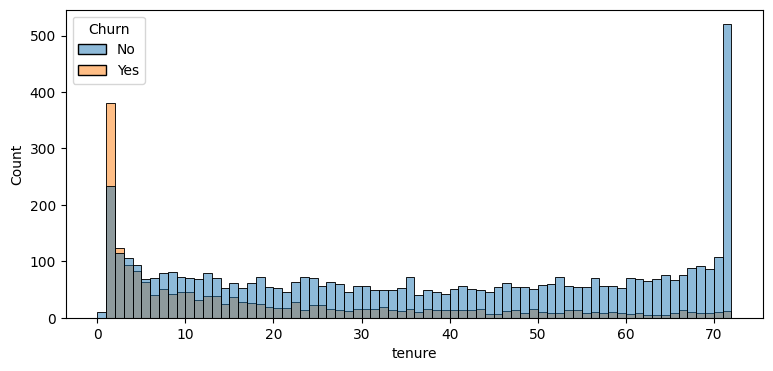

In [42]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

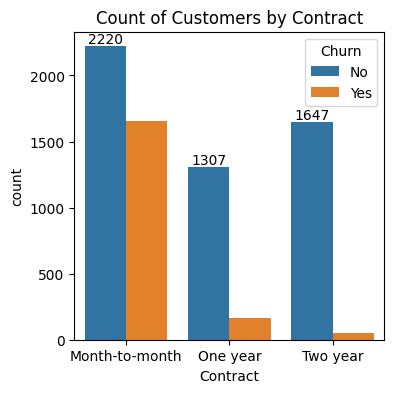

In [46]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

<b>As From the above Graph : </b>
<ul><li>Conclusion : Customers on Month basis Contract Have Higher Churn</li><li>Suggestion : Convince Customers to take One-year Contract(mention its benefits)</li></ul>

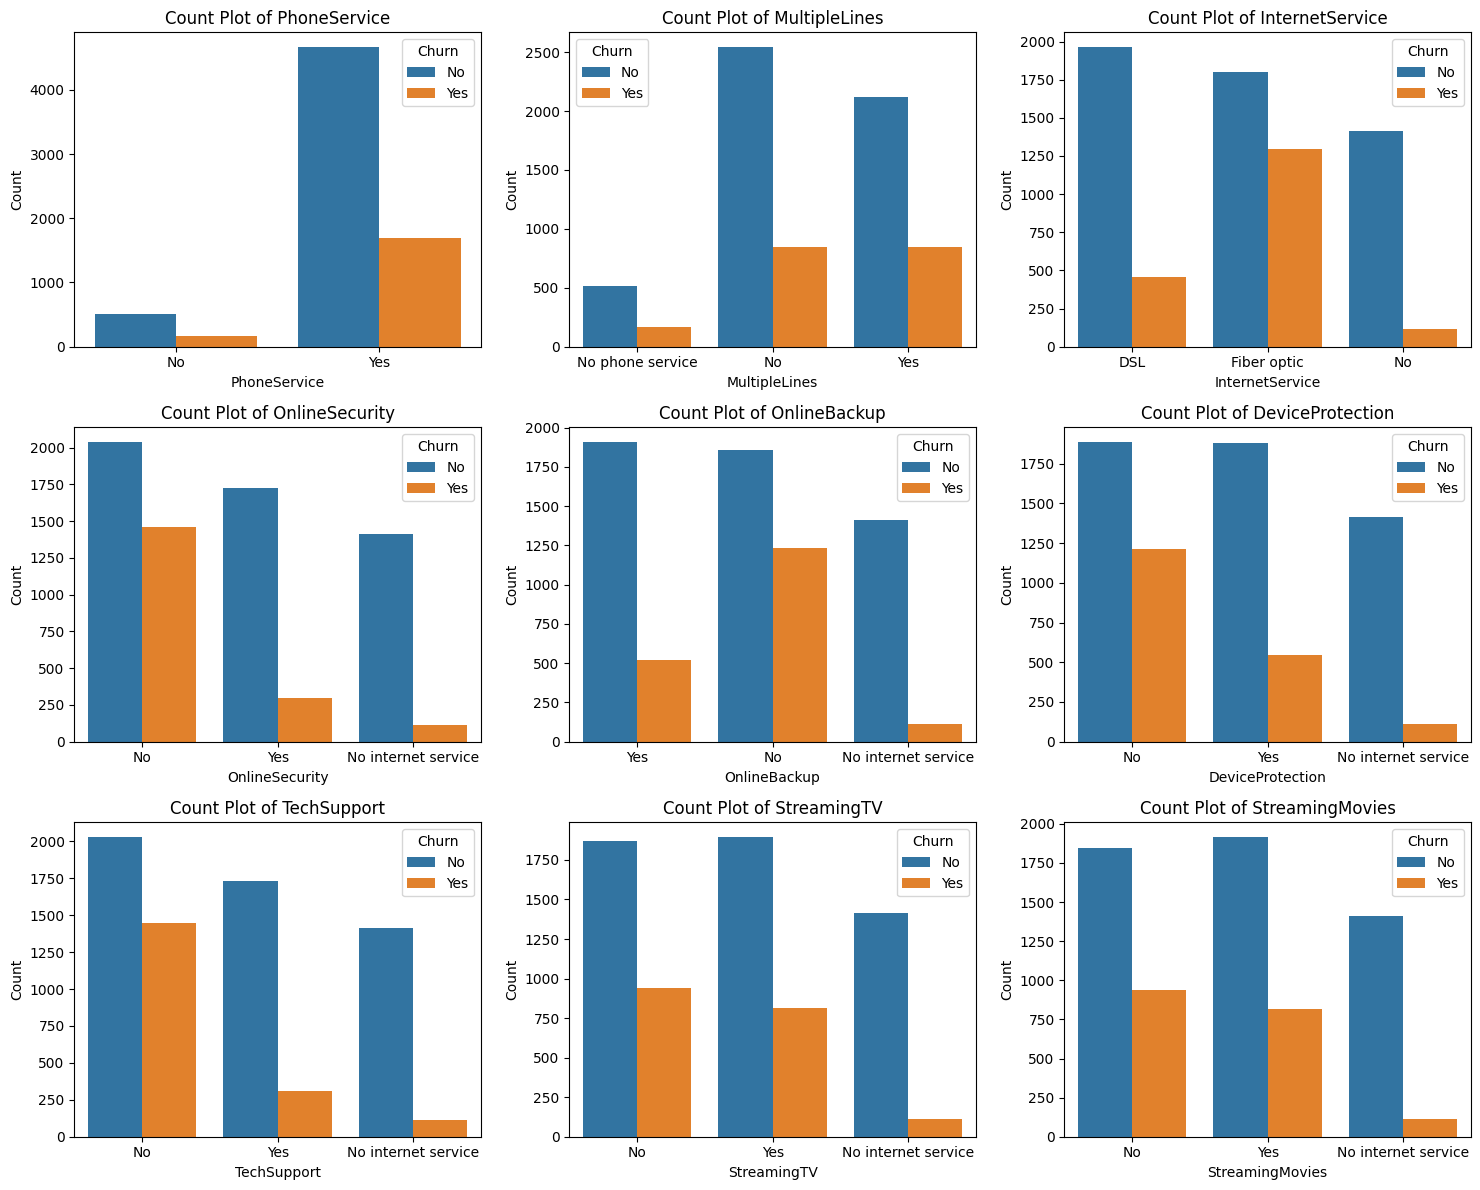

In [44]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<b>Based on the count plots of customer churn across various telecom services, it is evident that services like OnlineSecurity, OnlineBackup, TechSupport, and DeviceProtection are strongly associated with lower churn rates, suggesting that customers who subscribe to these value-added services are more likely to stay. In contrast, customers using Fiber Optic internet show a notably higher churn rate compared to DSL users, indicating potential dissatisfaction or cost concerns. The churn rates for StreamingTV and StreamingMovies are less conclusive but show slightly lower retention among non-users. Overall, improving the experience of fiber users and promoting supportive services like security and tech help can be effective churn reduction strategies.<b>


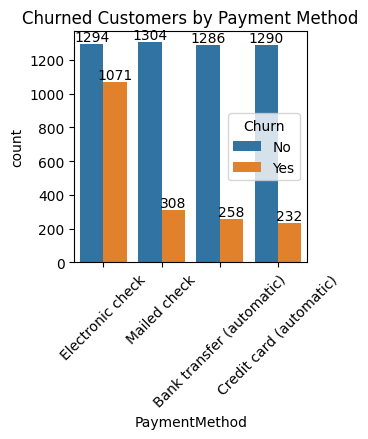

In [49]:
plt.figure(figsize = (3,3))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

Customers who opt for **Automatic Payment methods** exhibit a **significantly lower churn rate** compared to those using **Electronic Check**  option. This suggests that automation and convenience in billing may contribute to higher customer satisfaction and retention. In contrast, traditional or manual payment methods are associated with higher churn, possibly due to missed payments, added effort, or dissatisfaction with billing processes. Encouraging users to switch to automatic payments could be an effective strategy to reduce overall churn.
